#Data Project - Stock Market Analysis 
This Analysis will be answering the following questions along the way:

1. What was the change in price of the stock over time?

2. What was the daily return of the stock on average?

3. What was the moving average of the various stocks?

4. What was the correlation between different stocks' closing prices?

5. What was the correlation between different stocks' daily returns?

6. How much value do we put at risk by investing in a particular stock?

7. How can we attempt to predict future stock behavior?


In [2]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
import pandas_datareader.data as web

# For time stamps
from datetime import datetime

In [3]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [4]:
for stock in tech_list:   
    globals()[stock] = web.DataReader(stock,'yahoo',start,end)

We are going to have an analysis for Apple company stock market here:

In [5]:
AAPL.describe()

High         Low        Open       Close        Volume  \
count  252.000000  252.000000  252.000000  252.000000  2.520000e+02   
mean   116.169762  113.129791  114.751816  114.681339  1.299750e+08   
std     17.741086   17.248396   17.646768   17.453399  5.234579e+07   
min     75.809998   74.717499   75.087502   75.157501  4.669130e+07   
25%    110.356876  105.817497  107.442497  107.945002  9.138162e+07   
50%    120.599998  117.430000  119.351250  119.130001  1.147743e+08   
75%    129.607502  126.424997  128.372501  127.857498  1.545562e+08   
max    145.089996  141.369995  143.600006  143.160004  3.743368e+08   

        Adj Close  
count  252.000000  
mean   114.424090  
std     17.576481  
min     74.579391  
25%    107.598307  
50%    118.952248  
75%    127.805000  
max    142.946396

The adjusted closing price is a calculation adjustment made to a stock’s closing price. It is more complex and accurate than the closing price. The closing price is the raw price, which is just the cash value of the last transacted price before the market closes. We are going to look adjusted closing of Apple company in a plot:

<AxesSubplot:xlabel='Date'>

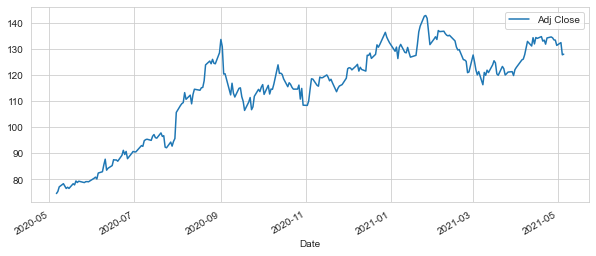

In [6]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

Now we are going to look at the volume of stock traded each day:

<AxesSubplot:xlabel='Date'>

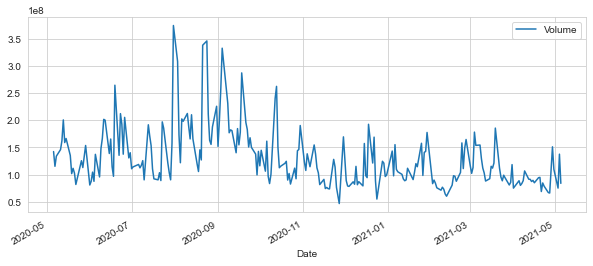

In [7]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In finance, a moving average (M.A.) is a stock indicator that is commonly used in technical analysis. By calculating the moving average, the impacts of random, short-term fluctuations on the price of a stock over a specified time-frame are mitigated. 

In [8]:
days = [10,20,50]
for ma in days:
    column_name = "M.A. for %s days" %(str(ma))
    AAPL[column_name]=AAPL['Adj Close'].rolling(ma).mean()

<AxesSubplot:xlabel='Date'>

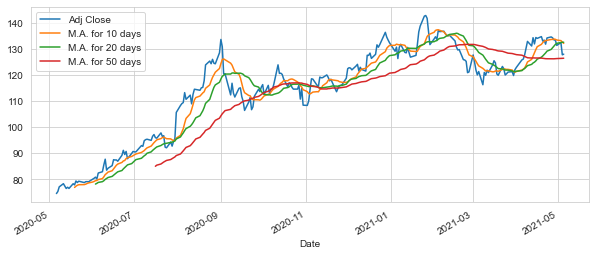

In [9]:
AAPL[['Adj Close','M.A. for 10 days','M.A. for 20 days','M.A. for 50 days']].plot(subplots=False,figsize=(10,4))

The daily return measures the dollar change in a stock's price as a percentage of the previous day's closing price. A positive return means the stock has grown in value, while a negative return means it has lost value. Let's go and have a visualization for daily return:

<AxesSubplot:xlabel='Date'>

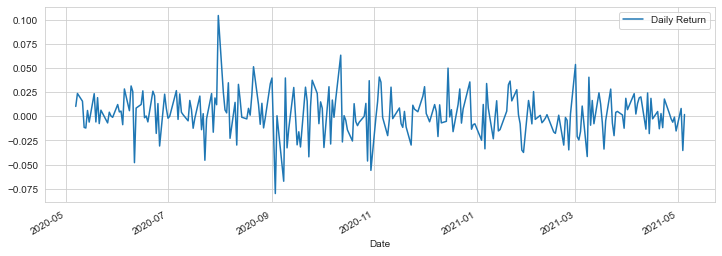

In [10]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(12,4),legend=True)

Now let's get an overall look at the average daily return using a histogram:

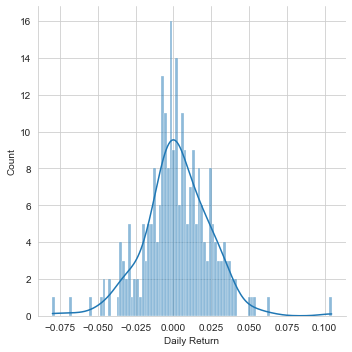

In [11]:
sns.displot(AAPL['Daily Return'].dropna(),bins=100, kde=True)

Now we can compare the daily percentage return of two stocks (google and miscrosoft) to check how correlated

In [12]:
stock_data = {'AAPL':AAPL['Adj Close'],
              'GOOG':GOOG['Adj Close'],
              'MSFT':MSFT['Adj Close'],
              'AMZN':AMZN['Adj Close']}
closing_df = pd.DataFrame(stock_data)

Returns_df=closing_df.pct_change()
Returns_df

AAPL      GOOG      MSFT      AMZN
Date                                              
2020-05-06       NaN       NaN       NaN       NaN
2020-05-07  0.010345  0.018749  0.005807  0.006954
2020-05-08  0.023802  0.011519  0.005882  0.005068
2020-05-11  0.015735  0.010725  0.011155  0.012351
2020-05-12 -0.011428 -0.019611 -0.022652 -0.021606
...              ...       ...       ...       ...
2021-04-29 -0.000749  0.021001 -0.008053  0.003704
2021-04-30 -0.015133 -0.008136 -0.001307 -0.001121
2021-05-03  0.008215 -0.006203 -0.001269 -0.023340
2021-05-04 -0.035386 -0.017084 -0.016160 -0.022035
2021-05-05  0.001955  0.001058 -0.005327 -0.012479

[252 rows x 4 columns]

pearsonr = 0.7016451287678027 , p= 1.5958247882337964e-38


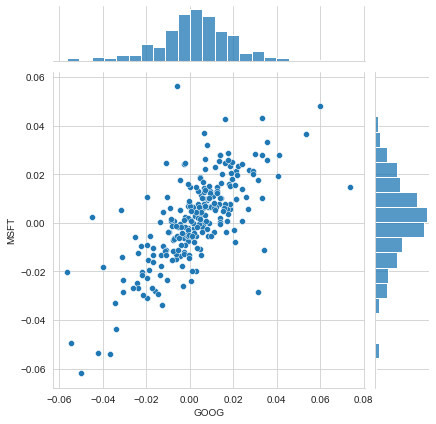

In [13]:
sns.jointplot(x='GOOG',y='MSFT',data=Returns_df,kind='scatter')
a = Returns_df['GOOG'].dropna()
b = Returns_df['MSFT'].dropna()
r,p = stats.pearsonr(a, b)
print('pearsonr =', r, ', p=', p)

So now let's see the "daily percentage return" for all four companies:

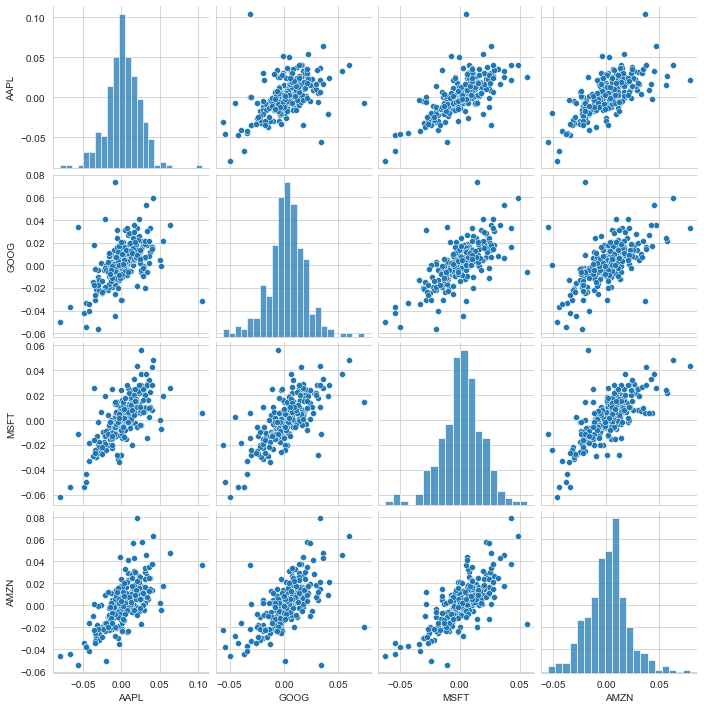

In [14]:
sns.pairplot(Returns_df.dropna())

To dig a little deeper in the same plot:

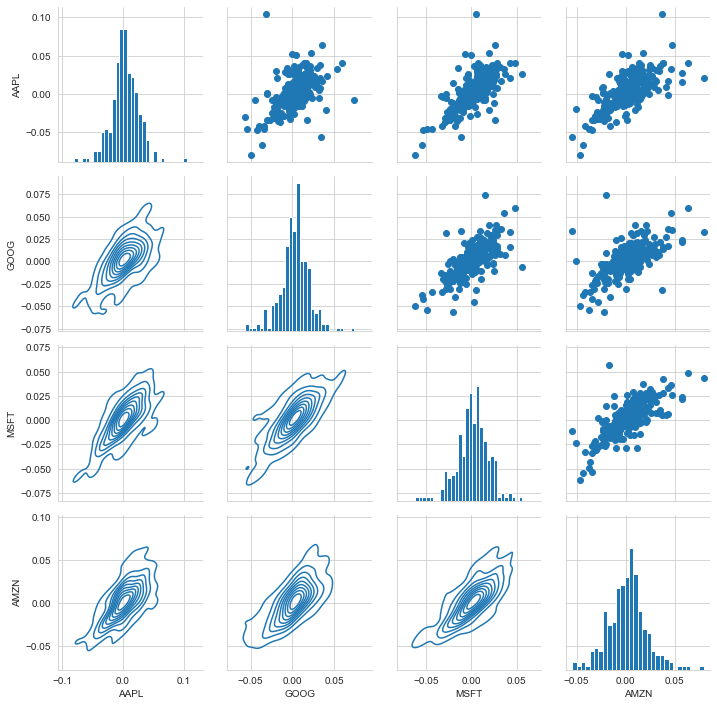

In [15]:
g = sns.PairGrid(Returns_df.dropna())

g.map_upper(plt.scatter)
g.map_diag(plt.hist,bins=30)
g.map_lower(sns.kdeplot)

We can see there is a corrolation between microsoft and amazon. Let's get a heatmap to make sure of that:

<AxesSubplot:>

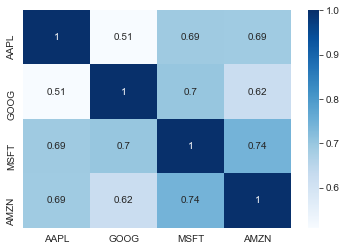

In [16]:
corr = Returns_df.corr()
sns.heatmap(corr, annot=True, cmap="Blues")

Great! Now let's analyze the corrolation between "closing price" for all four companies:

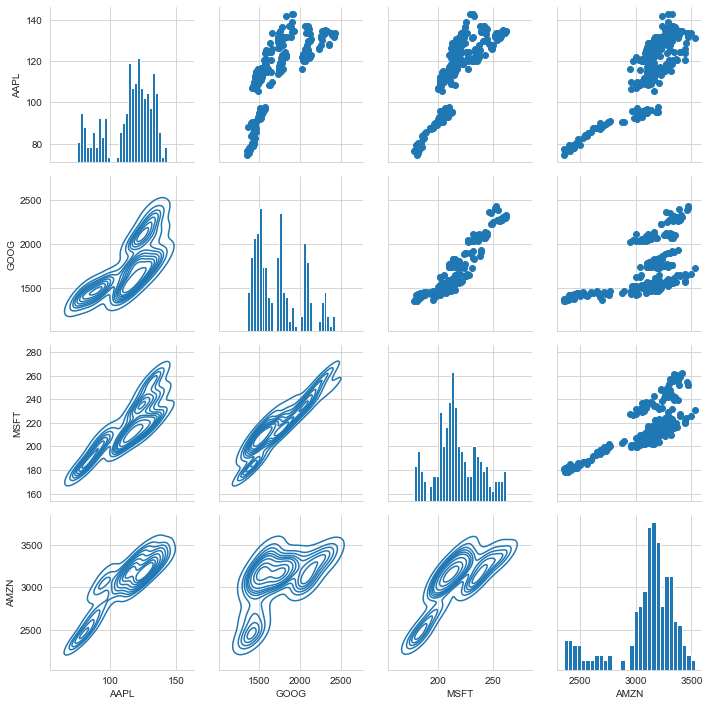

In [17]:
g = sns.PairGrid(closing_df.dropna())

g.map_upper(plt.scatter)
g.map_diag(plt.hist,bins=30)
g.map_lower(sns.kdeplot)

We can see there is a corrolation between many of them, specially google and microsoft. Let's get a heatmap to make sure of that:

<AxesSubplot:>

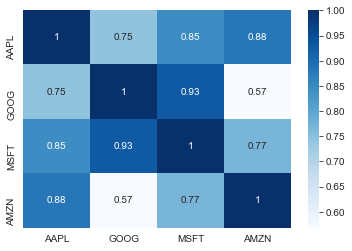

In [18]:
corr = closing_df.corr()
sns.heatmap(corr, annot=True, cmap="Blues")

Risk Analysis:
    
There are many ways we can quantify risk, one of them is by comparing the expected return with the standard deviation of the daily returns.

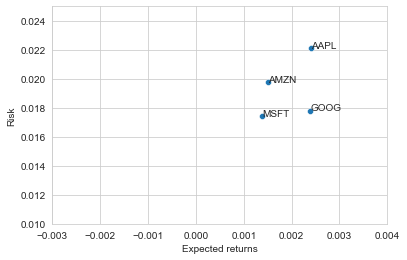

In [48]:
sns.scatterplot(x = Returns_df.dropna().mean(), y = Returns_df.dropna().std(), legend='full')

plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(Returns_df.dropna().columns, Returns_df.dropna().mean(), Returns_df.dropna().std()):
    plt.annotate(label, xy = (x, y), textcoords='data' )

value at risk:

Value at risk parameter can be defined as the amount of money we could expect to lose (so we are putting putting at risk) for a given confidence interval. There are several methods we can use for estimating a value at risk.

1."bootstrap" method
For this method we will calculate the empirical quantiles from a histogram of daily returns. (http://en.wikipedia.org/wiki/Quantile)

Let's look at the daily returns of Apple company again:

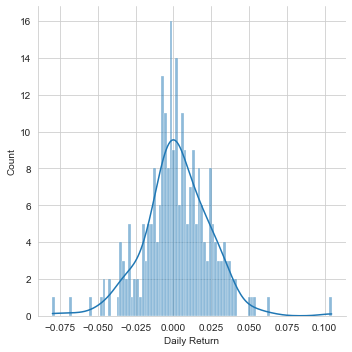

In [52]:
sns.displot(AAPL['Daily Return'].dropna(),bins=100, kde=True)

Now we can use quantile to get the risk value for the stock.

In [55]:
Returns_df.dropna()['AAPL'].quantile(0.05)

-0.03378330860507456

The 0.05 empirical quantile of daily returns is at -0.033. That means that with 95% confidence, our worst daily loss will not exceed 3.3%.

In [60]:
risk_value = {}
for i in tech_list:
    risk_value[i] = Returns_df.dropna()[i].quantile(0.05)
risk_value

{'AAPL': -0.03378330860507456,
 'GOOG': -0.028345515313980274,
 'MSFT': -0.02749958361375282,
 'AMZN': -0.02994135982097096}

We can see with 95% confidence, our worst daily loss in Apple, Google, Microsoft and Amazon will be 3.3%, 2.8%, 2.7% and 2.9%.

2. "Monte Carlo" method
Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.
We will use this formula:
$$ \Delta S = S(\mu\Delta t + \sigma \epsilon \sqrt{\Delta t}) $$ 
Where S is the stock price, mu is the expected return (which we calculated earlier),sigma is the standard deviation of the returns, t is time, and epsilon is the random variable.
Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each tiem period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be. (http://www.investopedia.com/articles/07/montecarlo.asp)
Let's do this for Google company stock:

In [68]:
days = 365
dt = 1/days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price

    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [69]:
GOOG.head()

High          Low         Open        Close   Volume  \
Date                                                                      
2020-05-06  1371.119995  1347.290039  1361.689941  1347.300049  1215400   
2020-05-07  1377.599976  1355.270020  1365.939941  1372.560059  1397600   
2020-05-08  1398.760010  1375.479980  1383.130005  1388.369995  1386900   
2020-05-11  1416.530029  1377.151978  1378.280029  1403.260010  1412100   
2020-05-12  1415.000000  1374.770020  1407.119995  1375.739990  1390600   

              Adj Close  
Date                     
2020-05-06  1347.300049  
2020-05-07  1372.560059  
2020-05-08  1388.369995  
2020-05-11  1403.260010  
2020-05-12  1375.739990

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

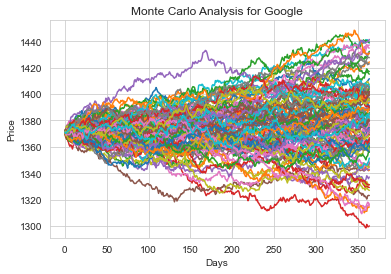

In [70]:
start_price = 1371.11

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [73]:
runs = 10000
simulations = np.zeros(runs)

for run in range(runs):    
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

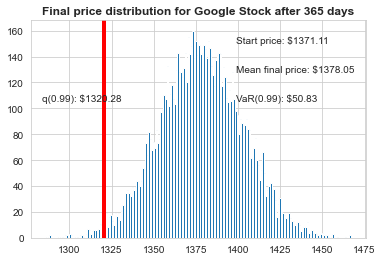

In [74]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google stock, which looks to be $50.83 for every investment of 1371.11 (the price of one inital google stock).

This basically menas for every initial stock you purchase your putting about $50.83 at risk 99% of the time from our Monte Carlo Simulation.